# Machine Learning jobs on Twitter

The aim of this mini project is to learn utilizing Twitter API in order to get an overview of on going Machine Learning jobs in the last 7 days.

The project is divided into 5 parts:
1. Importing requiring libraries and setting up 2.0 API Authentication.
2. Retrieving essential data in relation to Machine Learning positions in the market.
3. Converting text into Pandas DataFrame.
4. Checking the Tweets rate per second.
5. Filtering out most influenced elements in Machine Learning Tweets with visualisation.

### 1. Load Python Libraries and Set up Twitter Authentication

In [2]:
import tweepy
import json
import pprint
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Confirming the working directory is matching with the location of authentication file.

In [3]:
pwd()  

'C:\\Users\\My Computer\\Desktop\\DS projects\\DSIA\\DSIA-MEL-FT-201909-Projects master\\DSIA-MEL-FT-201909-Projects\\James Xuoi\\Week 3 - mini projects'

Assigning the my personal authentication details explicitly, as follows:

In [4]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_consumer_key = 'e01nZuMYwqyvVtk1BvPv3vWpo'
my_consumer_secret = 'LLGBh8xCS44esaztMmIyMWBkgFhKQwfHfQVd2R9AyeUafQHLlA'
my_access_token = '1181729231895588864-uMMPUqhFT3UuC7COILFf9h7nL1Vs52'
my_access_token_secret = 'XoU2Rxp5H5syAPG5kS8oSiYDJRdf7vjjgfuUVaMRVmm1V'

Connecting to Twitter for authentication purpose

In [5]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

### 2. Retrieving essential data in relation to Machine Learning positions in the market

Creating function via 'api.search' in Cursor method to retrieve searched text, date and time of Tweet's creation, user_id, etc.

In [6]:
def get_tweets_df1(twitter_content, max=200):
    json_str = [] #creating local variable 
    for status in tweepy.Cursor(api.search,#one of the main functions in tweepy.Cursor (https://www.programcreek.com/python/example/76301/tweepy.Cursor)
                           q=search_content, #search terms
                           result_type="recent",#most recent Tweets
                           lang="en",# setting English as Tweet's language
                           tweet_mode="extended", # Twitter's mode of retrieving full text
                           ).items(max):
        json_str.append(status._json) #adding all text statuses into a json file named json_str

    return pd.DataFrame(json_str)# converting json_str to Pandas DataFrame

### 3. Converting text into Pandas DataFrame.

In [8]:
search_content = 'data science job -filter:retweets' #assigning search keywords without text of retweets 
df1 = get_tweets_df1(search_content) #using created function to scrape Twitter's data and convert it into Pandas DataFrame
df1

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user
0,None,None,Thu Oct 17 14:53:34 +0000 2019,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,New job offer: Cox Automotive: Head of Data Sc...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{'id': 1278558607, 'id_str': '1278558607', 'na..."
1,None,None,Thu Oct 17 14:37:22 +0000 2019,"[0, 89]","{'hashtags': [{'text': 'rstats', 'indices': [7...",NaN,2,False,Interested in data science engineering? Check ...,None,...,None,False,NaN,NaN,NaN,2,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 712578432656359424, 'id_str': '71257843..."
2,None,None,Thu Oct 17 14:02:25 +0000 2019,"[0, 109]","{'hashtags': [{'text': 'San', 'indices': [57, ...",NaN,0,False,Head of Data Science job open...,None,...,None,False,NaN,NaN,NaN,1,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{'id': 3231839162, 'id_str': '3231839162', 'na..."
3,None,None,Thu Oct 17 14:00:12 +0000 2019,"[0, 159]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Job alert: Tenure-track Assistant Professor: ...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 4860637635, 'id_str': '4860637635', 'na..."
4,None,None,Thu Oct 17 13:54:46 +0000 2019,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1,False,"I'm not really that often on twitter, so I for...",None,...,None,False,{'created_at': 'Fri Sep 27 11:57:05 +0000 2019...,1.177553e+18,1177552740916109312,1,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 4067841321, 'id_str': '4067841321', 'na..."
5,None,None,Thu Oct 17 13:44:16 +0000 2019,"[0, 109]","{'hashtags': [{'text': 'San', 'indices': [57, ...",NaN,0,False,Head of Data Science job open...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{'id': 3231315638, 'id_str': '3231315638', 'na..."
6,None,None,Thu Oct 17 13:39:52 +0000 2019,"[0, 132]","{'hashtags': [{'text': 'job', 'indices': [4, 8...","{'media': [{'id': 1184826362542120962, 'id_str...",0,False,New #job opening at #Facebook in #RedmondWAUni...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://workfor.us/jobboard"" rel=""nofo...",False,"{'id': 212771235, 'id_str': '212771235', 'name..."
7,None,None,Thu Oct 17 13:25:18 +0000 2019,"[0, 155]","{'hashtags': [{'text': 'MSUepet', 'indices': [...",NaN,1,False,Job alert: Ithaca is looking for a math ed fac...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 198552308, 'id_str': '198552308', 'name..."
8,None,None,Thu Oct 17 13:07:32 +0000 2019,"[0, 136]","{'hashtags': [{'text': 'job', 'indices': [4, 8...",NaN,0,False,New #job: Senior AI Data Science Engineer Loca...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://www.broadbean.com"" rel=""nofoll...",False,"{'id': 197045516, 'id_str': '197045516', 'name..."
9,None,None,Thu Oct 17 12:54:49 +0000 2019,"[0, 109]","{'hashtags': [{'text': 'San', 'indices': [57, ...",NaN,0,False,Head of Data Science job open...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{'id': 3231505957, 'id_str': '3231505957', 'na..."


### 4. Checking the rate of Twitter activities per second.

Converting Tweet's created date and time to datetime datatype.

In [9]:
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['created_at'].head()

0   2019-10-17 14:53:34+00:00
1   2019-10-17 14:37:22+00:00
2   2019-10-17 14:02:25+00:00
3   2019-10-17 14:00:12+00:00
4   2019-10-17 13:54:46+00:00
Name: created_at, dtype: datetime64[ns, UTC]

Creating new DataFrame for visualising purposes

In [10]:
df2 = df1.groupby(['created_at'])['id'].agg(['count'])
df2 = df2.reset_index()
df2.head(5)

,created_at,count
0,2019-10-14 16:48:05+00:00,1
1,2019-10-14 17:17:24+00:00,1
2,2019-10-14 17:22:29+00:00,1
3,2019-10-14 17:42:47+00:00,1
4,2019-10-14 17:51:09+00:00,1


200 Tweets generated per 50 seconds of 'Machine Learning', therefore a Tweet of Machine Learning jobs is created every 0.25s

C:\Users\My Computer\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


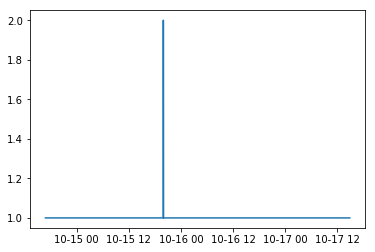

In [11]:
plt.plot(df2['created_at'],df2['count'])
plt.show()

### 5. Visualising top influencing noun-phrases in Machine Learning Jobs

Importing wordcloud and textblob libraries for text analysing

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob

Converting all full text into lowercase letters 

In [13]:
df1['full_text'] = df1['full_text'].str.lower()
df1['full_text'].head()

0    new job offer: cox automotive: head of data sc...
1    interested in data science engineering? check ...
2    head of data science                  job open...
3    job alert:  tenure-track assistant professor: ...
4    i'm not really that often on twitter, so i for...
Name: full_text, dtype: object

Creating text visualising function

In [14]:
def check_tweets_wordcloud(df1, withall=True):
    if withall:
        text = df1.full_text.values
    else:
        text = ','.join([x for x in df1.full_text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases()

    wordcloud = WordCloud(
        width=500,
        height=500,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(str(text))

    plt.figure(figsize=(10, 10), facecolor='k', edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

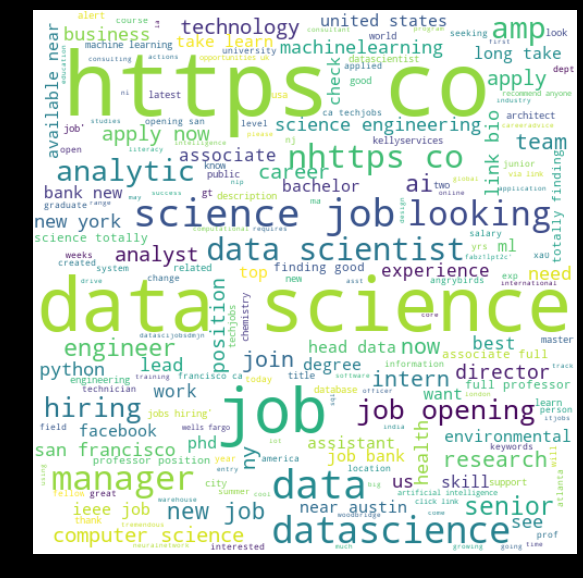

In [15]:
check_tweets_wordcloud(df1, withall=True)

Removing unnecessary words to clarify top influencing noun-phrases and re-visualising

In [16]:
#Strip words to clarify why people are truly interested in Machine learning
df1['full_text'] = df1['full_text'].str.replace('science', '')
df1['full_text'] = df1['full_text'].str.replace('co', '')
df1['full_text'] = df1['full_text'].str.replace('mputer', '')
df1['full_text'] = df1['full_text'].str.replace('machinelearning','')
df1['full_text'] = df1['full_text'].str.replace('machine','')
df1['full_text'] = df1['full_text'].str.replace('learning','')
df1['full_text'] = df1['full_text'].str.replace('https','')
df1['full_text'] = df1['full_text'].str.replace('artificial intelligence','')
df1['full_text'] = df1['full_text'].str.replace('using','')
df1['full_text'] = df1['full_text'].str.replace('ai','')
df1['full_text'] = df1['full_text'].str.replace('new','')
df1['full_text'] = df1['full_text'].str.replace('artificialintelligence','')
df1['full_text'] = df1['full_text'].str.replace('use','')
df1['full_text'] = df1['full_text'].str.replace('ml','')
df1['full_text'] = df1['full_text'].str.replace('job','')
df1['full_text'] = df1['full_text'].str.replace('jobs','')
df1['full_text'] = df1['full_text'].str.replace('looking','')
df1['full_text'] = df1['full_text'].str.replace('apply','')
df1['full_text'] = df1['full_text'].str.replace('link','')
df1['full_text'] = df1['full_text'].str.replace('interview','')
df1['full_text'] = df1['full_text'].str.replace('hiring','')
df1['full_text'] = df1['full_text'].str.replace('help','')
df1['full_text'] = df1['full_text'].str.replace('visit','')
df1['full_text'] = df1['full_text'].str.replace('will','')
df1['full_text'] = df1['full_text'].str.replace('boston','')
df1['full_text'] = df1['full_text'].str.replace('path','')
df1['full_text'] = df1['full_text'].str.replace('getting','')
df1['full_text'] = df1['full_text'].str.replace('will','')
df1['full_text'] = df1['full_text'].str.replace('click','')
df1['full_text'] = df1['full_text'].str.replace('now','')
df1['full_text'] = df1['full_text'].str.replace('work','')
df1['full_text'] = df1['full_text'].str.replace('bio','')
df1['full_text'] = df1['full_text'].str.replace('right','')
df1['full_text'] = df1['full_text'].str.replace('good','')
df1['full_text'] = df1['full_text'].str.replace('salary','')
df1['full_text'] = df1['full_text'].str.replace('want','')
df1['full_text'] = df1['full_text'].str.replace('position','')
df1['full_text'] = df1['full_text'].str.replace('opening','')

In [17]:
#df1['full_text'][df1['full_text'].str.contains('doxxing')]


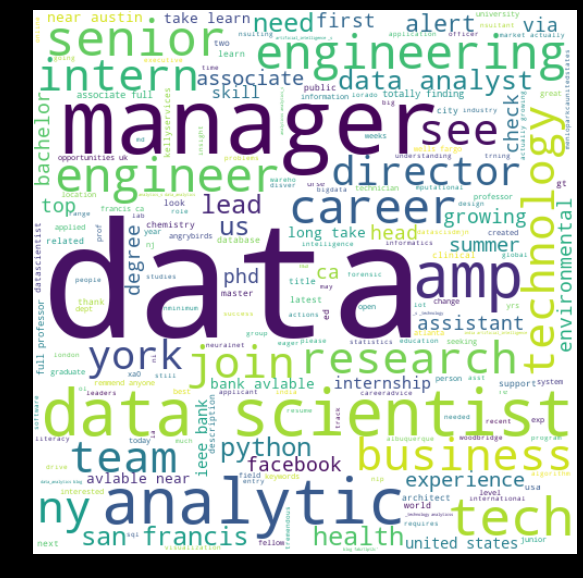

In [18]:
check_tweets_wordcloud(df1, withall=True)

# Conclusion

As a result, the most Machine Leaning roles are mentioned in 200 Tweets in the last 7 days are:
- Data Scientist
- Manager
- Director 
- Data analytic role/ Data Analyst
- Engineer
- Research
- Associate
- Asistant etc.

The TextBlob visualisation also shows different levels of the posion (senior, graduate, internship) as well as the demanding industries, companies and locations.

In [19]:
#df1.to_csv('tweeter_data2.csv',encoding='utf-8', index=False)